# Chapter 5: 오차역전파법
---

* 수치 미분은 단순하고 구현하기 쉽지만 계산 시간이 오래 걸리는 단점이 있다.
* 오차역전파법: 가중치 매개변수의 기울기(미분)를 효율적으로 계산


##### 5.1 계산 그래프   
: 계산 과정을 그래프(노드, 엣지)로 표현
   
    
* 예시 문제1: 현빈은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이 때 지불 금액을 구하세요. 단 소비세가 10% 부과됩니다.

<img src="./img/ch5-1.png" width="700" height="400">

* 예시 문제2: 현빈은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150원입니다. 소비세가 10% 일 때 지불 금액을 구하세요.
   
<img src="./img/ch5-2.png" width="700" height="400">

* 계산 그래프를 이용한 문제풀이 흐름
1. 계산 그래프를 구성한다.
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다. -> 순전파 <-> 역전파

**계산 그래프의 특징**
* 국소적 계산을 전파함으로써 최종 결과를 얻음.
    * 국소적: 자신과 직접 관계된 작은 범위 -> 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력

**왜 계산 그래프로 푸는가?**
   
계산 그래프의 이점:
* 국소적 계산
* 중간 계산 결과를 모두 보관
* **역전파를 통해 미분을 효율적으로 계산**   
   

<img src="./img/ch5-3.png" width="750" height="300">
   
-> **순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다!**


##### 5.2 연쇄법칙

<img src="./img/ch5-4.png" width="300" height="170">   

: 국소적 미분: 순전파 때의 $y = f(x)$ 계산의 미분을 구하는 것
   
* 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다. => **연쇄법칙의 원리**   
Ex)   
$z = t^2, \ t = x + y$ 일때,   
$\frac {\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} = 2t \cdot 1 = 2(x+y)$

<img src="./img/ch5-5.png" width="700" height="300">

##### 5.3 역전파   

<img src="./img/ch5-6.png" width="700" height="350">   
   
<img src="./img/ch5-7.jpg" width="700" height="400">
   
   
<img src="./img/ch5-8.png" width="500" height="700">

##### 5.4 단순한 계층 구현하기

* 사과 쇼핑 예를 파이썬으로 구현
* MulLayer: 곱셈 노드, AddLayer: 덧셈 노드
* forward(): 순전파, backward(): 역전파

In [22]:
# 곱셈 계층 구현
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):   # dout: 상류에서 넘어온 미분
        # x와 y를 바꾼다.
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

In [24]:
# 사과 쇼핑 구현
apple = 100
apple_cnt = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_cnt)
price = mul_tax_layer.forward(apple_price, tax)

print(int(price))

# 역전파
d_price = 1
d_apple_price, d_tax = mul_tax_layer.backward(d_price)
d_apple, d_apple_cnt = mul_apple_layer.backward(d_apple_price)

print(d_apple, int(d_apple_cnt), d_tax)

220
2.2 110 200


In [2]:
# 덧셈 계층 구현
class AddLayer:
    def __init__(self):
        pass    # 초기화 필요 없음
        
    def forward(self, x, y):
        out = x + y
        
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        
        return dx, dy

In [26]:
# 사과, 귤 쇼핑 구현
apple = 100
apple_cnt = 2
orange = 150
orange_cnt = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_cnt)
orange_price = mul_orange_layer.forward(orange, orange_cnt)
apple_orange_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(apple_orange_price, tax)

print(int(price))

# 역전파
d_price = 1
d_apple_orange_price, d_tax = mul_tax_layer.backward(d_price)
d_apple_price, d_orange_price = add_apple_orange_layer.backward(d_apple_orange_price)
d_orange, d_orange_cnt = mul_orange_layer.backward(d_orange_price)
d_apple, d_apple_cnt = mul_apple_layer.backward(d_apple_price)

print(d_apple, int(d_apple_cnt), round(d_orange,1), int(d_orange_cnt), d_tax)

715
2.2 110 3.3 165 650


##### 5.5 활성화 함수 계층 구현하기

<img src="./img/ch5-9.jpg" width="600">

In [17]:
# ReLU 계층 구현
class Relu:
    def __init__(self):
        self.mask = None
        
    def foraward(self, x):
        self.mask = (x <= 0)
        out = x.copy()          # out에 x를 복사한 다음
        out[self.mask] = 0      # x <= 0 인 원소에 0을 대입
        
        return 0
    
    def backward(self, dout):
        dout[self.mask] = 0     # x <= 0 이면 0을 하류로 보낸다.
        dx = dout
        
        return dx

In [19]:
import numpy as np
# mask 예제
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x <= 0)
print(mask)
x[mask] = 0
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]
[[1. 0.]
 [0. 3.]]


<img src="./img/ch5-10.png" width="600">   
<img src="./img/ch5-11.png" width="600">   
<img src="./img/ch5-12.png" width="600">

In [20]:
# Sigmoid 계층 구현
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * self.out * (1.0 - self.out)
        
        return dx

##### 5.6 Affine/Softmax 계층 구현하기

**Affine 계층**
* 행렬의 곱 계산은 대응하는 차원의 원소 수 일치가 핵심
* Affine: 행렬 곱의 기하학적 정의   

<img src="./img/ch5-13.png" width="600">

In [1]:
# Affine 계층 구현
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

**Softmax-with-Loss 계층**
* 소프트맥스 함수는 입력 값을 정규화하여 출력

<img src="./img/ch5-14.png" width=1000>

In [18]:
from common.functions import softmax, cross_entropy_error
# Softmax-with-Loss 계층 구현
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None    # 손실
        self.y = None       # Softmax 출력
        self.t = None       # 정답 레이블(one-hot)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

##### 5.7 오차역전파법 구현하기

* 전제: 신경망에서 학습은 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 일컫는다.
* 1단계 - 미니배치: 훈련 데이터 중 일부를 무작위로 가져옴, 미니배치의 손실 함수 값을 줄이는 것을 목표
* 2단계 - 기울기 산출: 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. - **오차역전파법**
* 3단계 - 매개변수 갱신: 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
* 4단계 - 반복: 1-3단계 반복

In [40]:
# 오차역전파법을 적용한 신경망 구현
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1']) 
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return self.lastLayer.forward(y, t)
        
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1']) 
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)
        
        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)        
            
        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads 

In [37]:
# 오차 역전파법으로 구한 기울기 검증하기
#   : 수치 미분법을 기준으로 오차 역전파법 기울기 확인
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:4.143353514396616e-10
b1:2.429056998061029e-09
W2:5.167873925152148e-09
b2:1.3982744209994903e-07


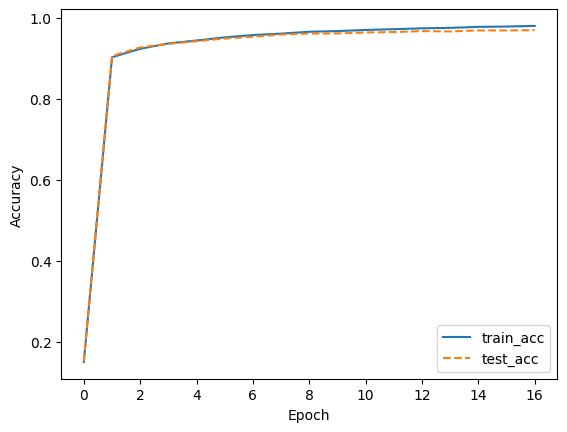

In [44]:
import matplotlib.pyplot as plt
# 오차역전파법을 사용한 학습 구현하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 오차역전파법으로 기울기를 구한다.
    grad = network.gradient(x_batch, t_batch)
    
    # 갱신
    for key in('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        # print(train_acc, test_acc)
        
plt.plot(train_acc_list, label="train_acc")  
plt.plot(test_acc_list, linestyle="--", label="test_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### 5.8 정리